In [1]:
print("""This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, A universal black-box quantum Monte Carlo approach to quantum phase transitions, arXiv:2408.03924v2 (2025).""")

This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, A universal black-box quantum Monte Carlo approach to quantum phase transitions, arXiv:2408.03924v2 (2025).


In [2]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import glob
import pandas as pd
import sys
import scipy
sys.path.append("../../utils")
from exact_calculations import (prl_gs_chiE, prl_gs_chiF, prl_beta_chiE,
prl_beta_chiX, prl_beta_chiF, prl_gs_fidsus)

matplotlib.style.use("./style.mplstyle")
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

In [3]:
fname = "../data/prx_fig5_xxz_data.csv"
cols = ["L", "beta", "Hoffdiag_value", "Hoffdiag_std", "Hoffdiag_Eint_value", "Hoffdiag_Eint_std", "Hoffdiag_Fint_value", "Hoffdiag_Fint_std", "mc_steps", "avg_q", "max_q", "avg_sgn", "sgn_std", "tot_cpu_time (s)", "wall_time (s)", "Tsteps", "steps", "Hoffdiag_test", "Hoffdiag_Eint_test", "Hoffdiag_Fint_test", "offdiag_ES_value", "offdiag_ES_std", "offdiag_FS_value", "offdiag_FS_std"]
df = pd.read_csv(fname, names=cols, skiprows=1)
# add offdiag fidsus columns
df['offdiag_FS_value'] = df['offdiag_FS_value'] / df['L']**2
df['offdiag_FS_std'] =  2 * df['offdiag_FS_std'] / df['L']**2
# add offdiag ES columns
df['offdiag_ES_value'] = df['offdiag_ES_value'] / df['L']**2
df['offdiag_ES_std'] = 2 * df['offdiag_ES_std'] / df['L']**2
# add off-diag fidsus columns
df['T'] = 1 / df.beta
df.head()

,L,beta,Hoffdiag_value,Hoffdiag_std,Hoffdiag_Eint_value,Hoffdiag_Eint_std,Hoffdiag_Fint_value,Hoffdiag_Fint_std,mc_steps,avg_q,...,Tsteps,steps,Hoffdiag_test,Hoffdiag_Eint_test,Hoffdiag_Fint_test,offdiag_ES_value,offdiag_ES_std,offdiag_FS_value,offdiag_FS_std,T
0,10.0,1.025641,-23.882261,0.004137,607.542604,0.232697,77.586936,0.030222,100000000000,24.494012,...,10000000,500000000,False,False,False,0.225555,0.000975,0.025886,0.000141,0.975
1,10.0,1.052632,-24.094686,0.002251,634.049895,0.136424,83.090299,0.018356,100000000000,25.362951,...,10000000,500000000,True,True,True,0.229406,0.000920,0.026812,0.000147,0.950
2,10.0,1.081081,-24.299077,0.003344,661.705200,0.204764,89.038318,0.028121,100000000000,26.268760,...,10000000,500000000,True,True,True,0.233861,0.001015,0.027790,0.000160,0.925
3,10.0,1.000000,-23.578086,0.003029,577.850755,0.167236,71.957975,0.021316,100000000000,23.580027,...,10000000,500000000,False,False,False,0.219246,0.000825,0.024672,0.000125,1.000
4,10.0,1.111111,-24.468725,0.003224,689.199892,0.209026,95.299321,0.030124,100000000000,27.188025,...,10000000,500000000,False,False,False,0.239571,0.001261,0.029045,0.000218,0.900


# Fidelity susceptibility plot

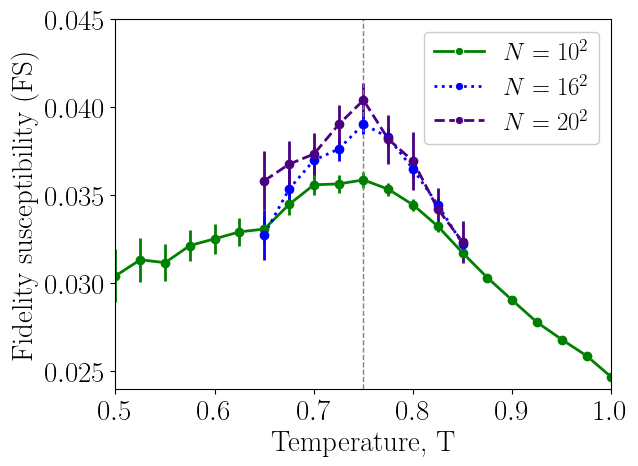

In [27]:
# Remove failed instances to plot
df_L10 = df[df['L'] == 10]
df_L16 = df[df['L'] == 16]
df_L20 = df[df['L'] == 20]

#L = 10 plot
lineplot = sns.lineplot(x="T", y="offdiag_FS_value", data=df_L10, marker='o', linestyle='-', color="green", markersize=6, label=r"$N=10^2$")
plt.errorbar(x=df_L10["T"], y = df_L10["offdiag_FS_value"], yerr=df_L10["offdiag_FS_std"], fmt='o', color=lineplot.get_lines()[-1].get_color(), label=None)
# L = 16 plot
lineplot = sns.lineplot(x="T", y="offdiag_FS_value", data=df_L16, marker='o', linestyle=':', color="blue", markersize=6, label=r"$N=16^2$")
plt.errorbar(x=df_L16["T"], y = df_L16["offdiag_FS_value"], yerr=df_L16["offdiag_FS_std"], fmt='o', color=lineplot.get_lines()[-1].get_color(), label=None)
# L = 20 plot
lineplot = sns.lineplot(x="T", y="offdiag_FS_value", data=df_L20, marker='o', linestyle='--', color="indigo", markersize=6, label=r"$N=20^2$")
plt.errorbar(x=df_L20["T"], y = df_L20["offdiag_FS_value"], yerr=df_L20["offdiag_FS_std"], fmt='o', color=lineplot.get_lines()[-1].get_color(), label=None)


#plt.legend(loc=(0.3, 0.01), fontsize=18)
plt.legend(fontsize=18)

plt.axvline(x=3/4, color='gray', linestyle='--', linewidth=1, label=r"$T = \frac{3}{4}$")

lineplot.set_ylim(0.024, 0.045)
lineplot.set_xlim(0.5, 1.0)
lineplot.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
lineplot.set_xlabel(r"Temperature, T")
lineplot.set_ylabel(r"Fidelity susceptibility (FS)")
fig = lineplot.get_figure()
fig.savefig("figures/prx_fig5_fidsus.pdf", dpi=800, bbox_inches="tight")

# Energy susceptibility plot

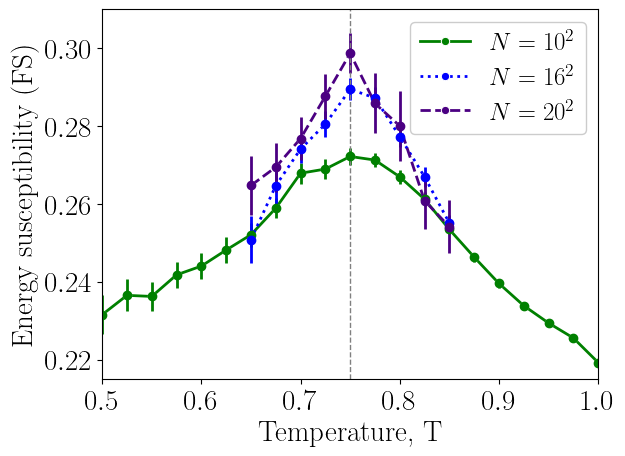

In [30]:
# Remove failed instances to plot
df_L10 = df[df['L'] == 10]
df_L16 = df[df['L'] == 16]
df_L20 = df[df['L'] == 20]

#L = 10 plot
lineplot = sns.lineplot(x="T", y="offdiag_ES_value", data=df_L10, marker='o', linestyle='-', color="green", markersize=6, label=r"$N=10^2$")
plt.errorbar(x=df_L10["T"], y = df_L10["offdiag_ES_value"], yerr=df_L10["offdiag_ES_std"], fmt='o', color=lineplot.get_lines()[-1].get_color(), label=None)
# L = 16 plot
lineplot = sns.lineplot(x="T", y="offdiag_ES_value", data=df_L16, marker='o', linestyle=':', color="blue", markersize=6, label=r"$N=16^2$")
plt.errorbar(x=df_L16["T"], y = df_L16["offdiag_ES_value"], yerr=df_L16["offdiag_ES_std"], fmt='o', color=lineplot.get_lines()[-1].get_color(), label=None)
# L = 20 plot
lineplot = sns.lineplot(x="T", y="offdiag_ES_value", data=df_L20, marker='o', linestyle='--', color="indigo", markersize=6, label=r"$N=20^2$")
plt.errorbar(x=df_L20["T"], y = df_L20["offdiag_ES_value"], yerr=df_L20["offdiag_ES_std"], fmt='o', color=lineplot.get_lines()[-1].get_color(), label=None)


plt.legend(fontsize=18)

plt.axvline(x=3/4, color='gray', linestyle='--', linewidth=1, label=r"$T = \frac{3}{4}$")

lineplot.set_ylim(0.215, 0.31)
lineplot.set_xlim(0.5, 1.0)
lineplot.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
lineplot.set_xlabel(r"Temperature, T")
lineplot.set_ylabel(r"Energy susceptibility (FS)")
fig = lineplot.get_figure()
fig.savefig("figures/prx_fig5_esus.pdf", dpi=800, bbox_inches="tight")